# Imports

In [1]:
import pandas as pd

# Load data

In [2]:
df_all_seeds = pd.read_csv("10k_iter_all_seeds_evaluation.csv")

In [3]:
df_all_seeds.head()

,seed,private_agent,collective_agent,player0,player1,evaluation_scenario,player0_score,player1_score,mean_score,private_agent_score,collective_agent_score
0,123,agent_0,agent_0,private,collective,pc,13.0,17.0,15.0,13.0,17.0
1,123,agent_0,agent_0,private,collective,pc,8.0,6.0,7.0,8.0,6.0
2,123,agent_0,agent_0,collective,private,cp,2.0,4.0,3.0,4.0,2.0
3,123,agent_0,agent_0,private,collective,pc,1.0,4.0,2.5,1.0,4.0
4,123,agent_0,agent_0,private,private,pp,24.0,23.0,23.5,NaN,NaN


# Statistical analysis of samples

## CC and PP

### Mann Whitney U test

In [4]:
import scipy.stats as stats
df_cc = df_all_seeds[(df_all_seeds["evaluation_scenario"]=="cc")]
df_pp = df_all_seeds[(df_all_seeds["evaluation_scenario"]=="pp")]
# create vectors of all scores in cc and pp scenarios
cc_all = pd.DataFrame(pd.concat([df_cc["player0_score"], df_cc["player1_score"]], ignore_index=True),columns=["score"])
pp_all = pd.DataFrame(pd.concat([df_pp["player0_score"], df_pp["player1_score"]], ignore_index=True),columns=["score"])

# Statistical tests
sample1 = cc_all["score"]
sample2 = pp_all["score"]
# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"Player0 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"Player1 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the samples are equal.\n")


# Mann-Witney U test
stat, pvalue = stats.mannwhitneyu(cc_all,pp_all,alternative='greater')
print(f"U Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is less than 0.05, so we reject the null hypothesis that the distributions of \n \
scores in cc and pp scenarios are equal in favour of the alternative hypothesis that the scores in cc are greater than in pp.\n")

# Brunner Munzel test
stat, pvalue = stats.brunnermunzel(sample1,sample2,alternative='greater')
print(f"BM Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is less than 0.05, so we reject the null hypothesis that the distributions of \n \
scores in cc and pp scenarios are equal in favour of the alternative hypothesis that the scores in cc are greater than in pp.\n")

Shapiro-Wilk Test for Normality
Player0 in CC Scenario: 0.9311281979369668, 4.473373387296891e-43
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
Player1 in CC Scenario: 0.9313309657097412, 3.013432499622475e-43
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 7.494007132722759, P-value: 0.0062013841815259235
The pvalue is smaller than 0.05, so we reject the null hypothesis that the variances of the samples are equal.

U Statistic: [13234832.]
P-value: [1.83565814e-06]
The pvalue is less than 0.05, so we reject the null hypothesis that the distributions of 
 scores in cc and pp scenarios are equal in favour of the alternative hypothesis that the scores in cc are greater than in pp.

BM Statistic: -4.634979026128854
P-value: 1.8074730154365103e-06
The pvalue is less than 0.05, so we reject the null hypothesis that th

/tmp/ipykernel_3538/2976733105.py:16: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5046.
  stat, pvalue = stats.shapiro(sample2)


### Violin plots of **All scores**

/tmp/ipykernel_3538/205999450.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x="type", y="score", palette=color_palette)


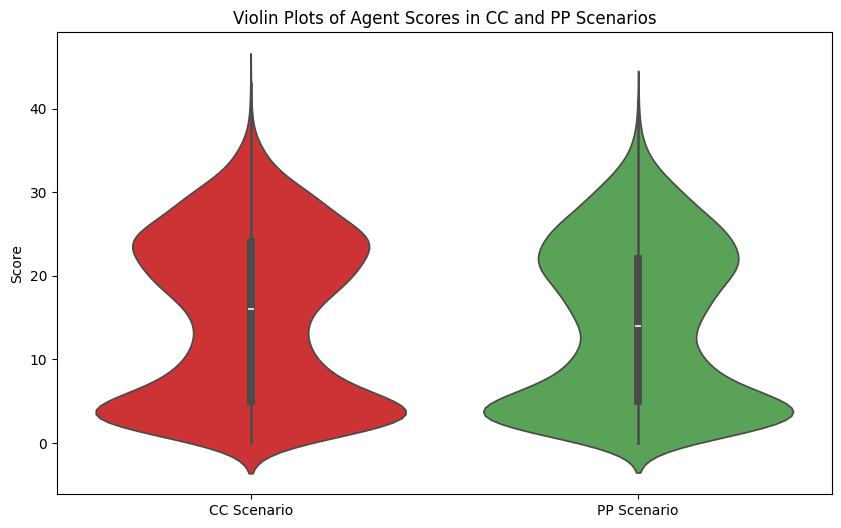

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette = [color_palette[0],color_palette[2]]
# Dataframe for violin plot
df_cc = df_all_seeds[(df_all_seeds["evaluation_scenario"]=="cc")]
df_pp = df_all_seeds[(df_all_seeds["evaluation_scenario"]=="pp")]
# create vectors of all scores in cc and pp scenarios
cc_all = pd.DataFrame(pd.concat([df_cc["player0_score"], df_cc["player1_score"]], ignore_index=True),columns=["score"])
pp_all = pd.DataFrame(pd.concat([df_pp["player0_score"], df_pp["player1_score"]], ignore_index=True),columns=["score"])
import seaborn as sns
import matplotlib.pyplot as plt
# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette = [color_palette[0],color_palette[2]]
# Dataframe for violin plot
# Craete violin plot CC vs PP
cc_df = pd.DataFrame(cc_all)
cc_df['type'] = 'CC'
cc_df.columns = ['score', 'type']
pp_df = pd.DataFrame(pp_all)
pp_df['type'] = 'PP'
pp_df.columns = ['score', 'type']
violin_df = pd.concat([cc_df, pp_df])
violin_df.columns = ['score', 'type']
# Craete violin plot CC vs PP
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_df, x="type", y="score", palette=color_palette)
# Set the labels and title
plt.xlabel('')
plt.ylabel('Score')
plt.title('Violin Plots of Agent Scores in CC and PP Scenarios')

# Set the x labels
labels = ['CC Scenario', 'PP Scenario']
plt.xticks(ticks=[0, 1], labels=labels)
plt.savefig('figures/2_score_comparison/CC_PP_violin.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



### Violin plots of **Mean score**

/tmp/ipykernel_3538/3520765972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_all_seeds, x='evaluation_scenario', y='mean_score', palette=color_palette,


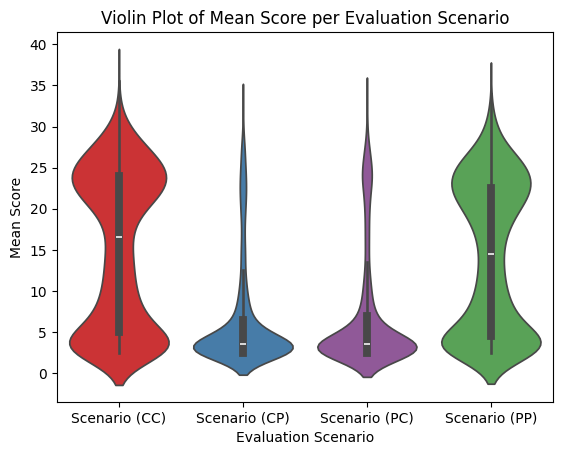

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette[2], color_palette[3] = color_palette[3], color_palette[2]
# Create a violin plot with the specified color palette
sns.violinplot(data=df_all_seeds, x='evaluation_scenario', y='mean_score', palette=color_palette,
               order=['cc', 'cp', 'pc', 'pp'])

# Set the labels and title
plt.xlabel('Evaluation Scenario')
plt.ylabel('Mean Score')
plt.title('Violin Plot of Mean Score per Evaluation Scenario')

# Set the x labels
labels = ['Scenario (CC)', 'Scenario (CP)', 'Scenario (PC)', 'Scenario (PP)']
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)

# Display the plot
plt.show()


/tmp/ipykernel_87861/630446757.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x='evaluation_scenario', y='mean_score', palette=color_palette,
/tmp/ipykernel_87861/630446757.py:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(data=violin_df, x='evaluation_scenario', y='mean_score', palette=color_palette,


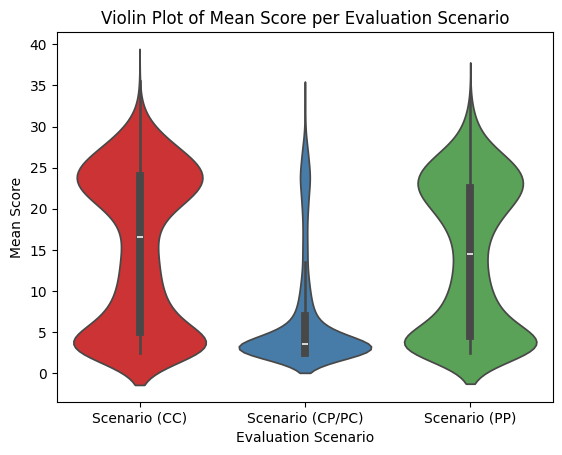

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
# color_palette[2], color_palette[3] = color_palette[3], color_palette[2]
# Create violin dataframe
violin_df = df_all_seeds.copy()
violin_df['evaluation_scenario'] = violin_df['evaluation_scenario'].replace({'cp': 'cp/pc', 'pc': 'cp/pc'})
# Create a violin plot with the specified color palette
sns.violinplot(data=violin_df, x='evaluation_scenario', y='mean_score', palette=color_palette,
               order=['cc', 'cp/pc', 'pp'])

# Set the labels and title
plt.xlabel('Evaluation Scenario')
plt.ylabel('Mean Score')
plt.title('Violin Plot of Mean Score per Evaluation Scenario')

# Set the x labels
labels = ['Scenario (CC)', 'Scenario (CP/PC)', 'Scenario (PP)']
plt.xticks(ticks=[0, 1, 2], labels=labels)

# Display the plot
plt.show()


/tmp/ipykernel_3538/2879931421.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_all_seeds, x='evaluation_scenario', y='mean_score', palette=color_palette,
/tmp/ipykernel_3538/2879931421.py:8: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.violinplot(data=df_all_seeds, x='evaluation_scenario', y='mean_score', palette=color_palette,


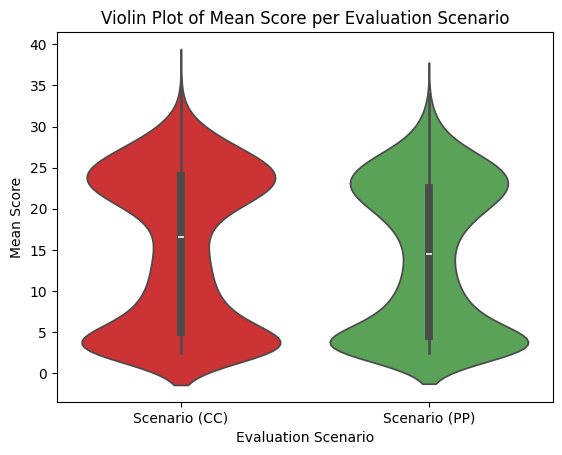

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette[1] = color_palette[2]
# Create a violin plot with the specified color palette
sns.violinplot(data=df_all_seeds, x='evaluation_scenario', y='mean_score', palette=color_palette,
               order=['cc', 'pp'])

# Set the labels and title
plt.xlabel('Evaluation Scenario')
plt.ylabel('Mean Score')
plt.title('Violin Plot of Mean Score per Evaluation Scenario')

# Set the x labels
labels = ['Scenario (CC)','Scenario (PP)']
plt.xticks(ticks=[0, 1], labels=labels)

# Display the plot
plt.show()


### Density plots

In [9]:
import seaborn as sns
# Create color palette for CC and PP scenarios
color_palette_cc_pp = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
# Use blue 1 and purple 3 which are acossiated with PC and PC
# Dim the colors for private agent
red, green = color_palette_cc_pp[0], color_palette_cc_pp[2]
def dim_color(color, factor):
    return tuple([c * factor for c in color])
dark_red, dark_green = dim_color(red, 0.5), dim_color(green, 0.5)
color_palette_cc_pp = [dark_red, red, dark_green, green]

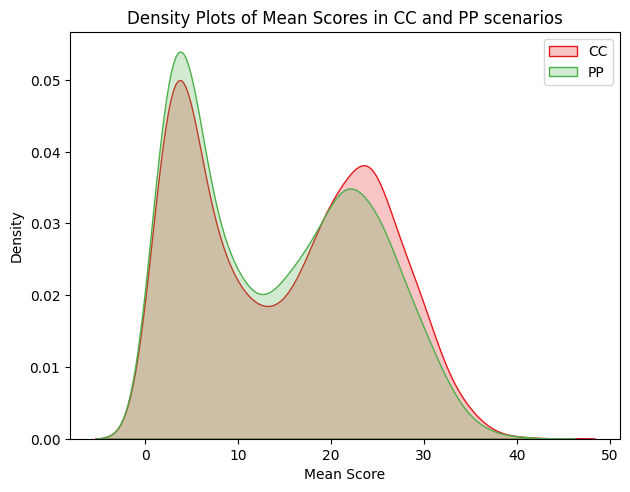

In [10]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the density plots 
sns.kdeplot(data=cc_all, x='score', fill=True, color=color_palette_cc_pp[1],label="CC")
sns.kdeplot(data=pp_all, x='score', fill=True, color=color_palette_cc_pp[3],label="PP")
# Adjust the layout of subplots
plt.tight_layout()
# Add title
plt.title("Density Plots of Mean Scores in CC and PP scenarios")
# Change x axis label
plt.xlabel("Mean Score")
# Show the legend
plt.legend()
# Show the plot
plt.show()

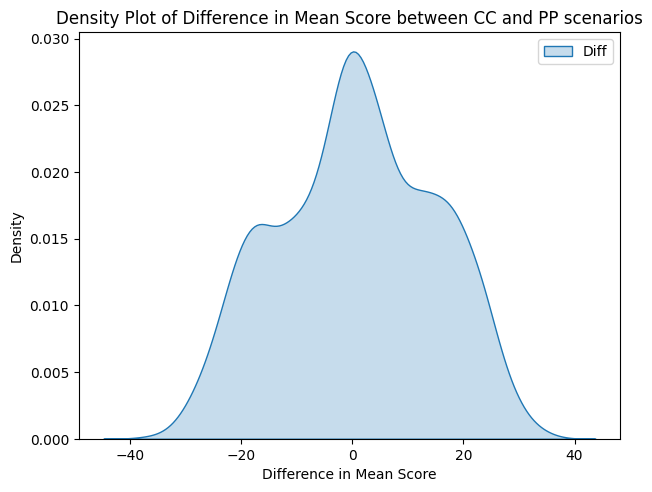

In [11]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new column with the difference between the two scores
score_diff = cc_all - pp_all
# Plot the density plots 
sns.kdeplot(data=score_diff, x="score", fill=True,label="Diff")
# Adjust the layout of subplots
plt.tight_layout()
# Add title
plt.title("Density Plot of Difference in Mean Score between CC and PP scenarios")
# Change x axis label
plt.xlabel("Difference in Mean Score")
# Show the legend
plt.legend()
# Show the plot
plt.show()

## CP and PC

### Wilcoxon signed-rank test

In [12]:
df = df_all_seeds[(df_all_seeds["evaluation_scenario"]=="cp")|(df_all_seeds["evaluation_scenario"]=="pc")]
col_all = df["collective_agent_score"]
priv_all = df["private_agent_score"]
# Statistical tests
sample1 = col_all
sample2 = priv_all
# Check the normality of the samples
print("Shapiro-Wilk Test for Normality")
stat, pvalue = stats.shapiro(sample1)
print(f"Player0 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")
stat, pvalue = stats.shapiro(sample2)
print(f"Player1 in CC Scenario: {stat}, {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.")


# Check equality of variance
print("\nLevene Test for Equality of Variance")
stat, pvalue = stats.levene(sample1, sample2)
print(f"Levene Statistic: {stat}, P-value: {pvalue}")
print("The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the variances of the samples are equal.\n")

# Perform Wilcoxon signed-rank test
stat, pvalue = stats.wilcoxon(x=col_all, y=priv_all, alternative="greater")
print(f"Wilcoxon Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvale is less than 0.05, so we reject the null hypothesis that the distributions of \n \
scores for CAgents and PAgents are equal in favour of the alternative hypothesis that the scores of CAgents are greater than scores of PAgents.\n")
# In case differences are not symmetric a two-sample paired sign test is performed
from statsmodels.stats.descriptivestats import sign_test
stat, pvalue = sign_test(sample1-sample2,0)
print(f"Sign Test Statistic: {stat}")
print(f"P-value: {pvalue}")
print("The pvalue is smaller than 0.05, so we reject the null hypothesis that the distributions of \n \
scores for CAgents and PAgents are equal in favour of the alternative hypothesis that the scores of CAgents are greater than scores of PAgents.")

Shapiro-Wilk Test for Normality
Player0 in CC Scenario: 0.7143709099354202, 1.876391243186102e-68
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.
Player1 in CC Scenario: 0.6970830942943005, 1.2481582906861448e-69
The pvalue is smaller than 0.05, so we reject the null hypothesis that the sample is normally distributed.

Levene Test for Equality of Variance
Levene Statistic: 2.842173789271394, P-value: 0.09185120399703448
The pvalue is greater than 0.05, so we fail to reject the null hypothesis that the variances of the samples are equal.

Wilcoxon Statistic: 7307318.5
P-value: 3.2919161990926767e-105
The pvale is less than 0.05, so we reject the null hypothesis that the distributions of 
 scores for CAgents and PAgents are equal in favour of the alternative hypothesis that the scores of CAgents are greater than scores of PAgents.

Sign Test Statistic: 732.0
P-value: 1.822780214820966e-104
The pvalue is smaller than 0.05, so we r

/tmp/ipykernel_3538/2739336553.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff, color='blue', shade=True)


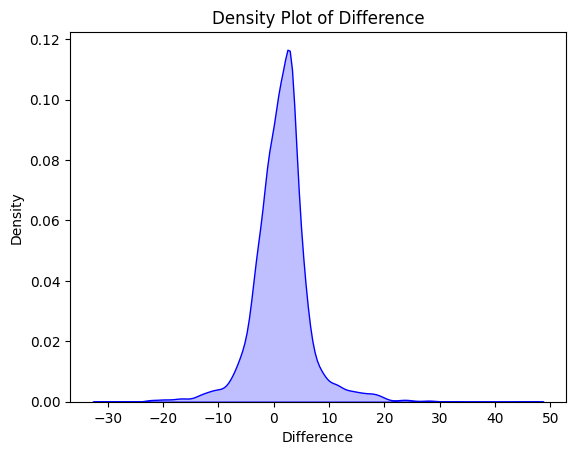

1.3124122719069582 1.0
Skewness: 0.36155318945708753


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
diff = sample1 - sample2
# Plot the density of the difference
sns.kdeplot(diff, color='blue', shade=True)

# Set the labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Density Plot of Difference')
plt.savefig('figures/2_score_comparison/diff_symmetry.png', format='png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
print(diff.mean(),diff.median())
skewness = stats.skew(diff)
print("Skewness:", skewness)


### Violin Plots

/tmp/ipykernel_3538/3609051496.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_df, x="type", y="score", palette=color_palette)


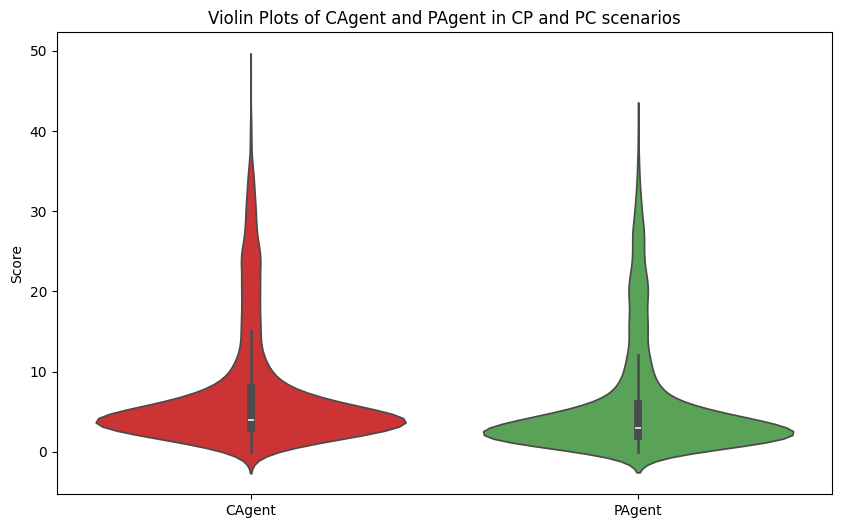

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette = [color_palette[0],color_palette[2]]
# Dataframe for violin plot
col_df = pd.DataFrame(col_all)
col_df['type'] = 'C'
col_df.columns = ['score', 'type']
# col_df = col_df[:-1]
priv_df = pd.DataFrame(priv_all)
priv_df['type'] = 'P'
priv_df.columns = ['score', 'type']
# priv_df = priv_df[:-1]
violin_df = pd.concat([col_df, priv_df])
violin_df.columns = ['score', 'type']
# Craete violin plot Colecctive vs Private
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_df, x="type", y="score", palette=color_palette)
# Set the labels and title
plt.xlabel('')
plt.ylabel('Score')
plt.title('Violin Plots of CAgent and PAgent in CP and PC scenarios')

# Set the x labels
labels = ['CAgent', 'PAgent']
plt.xticks(ticks=[0, 1], labels=labels)
plt.savefig('figures/2_score_comparison/CAgent_PAgent_violin.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### Density plots

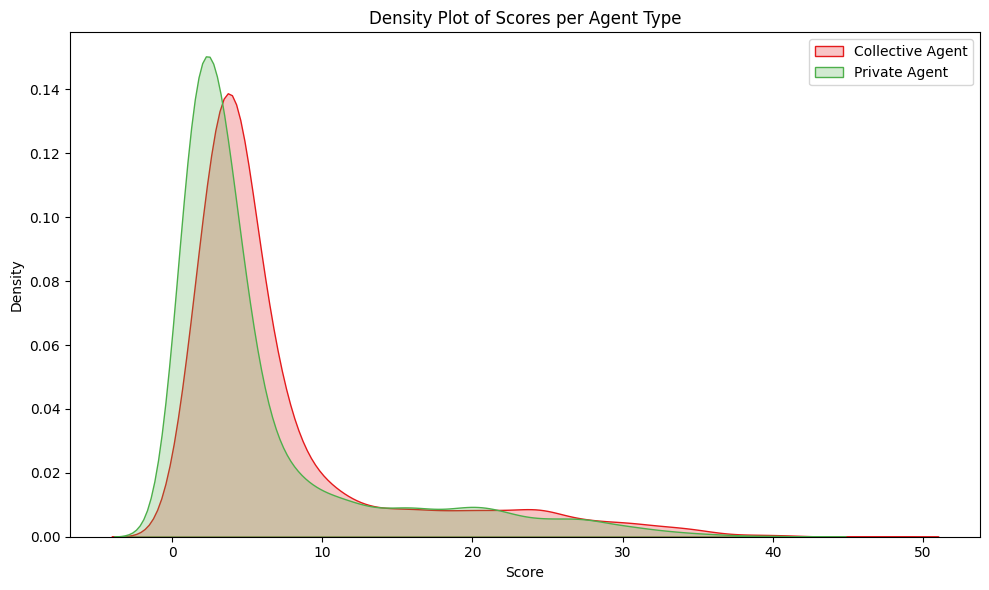

In [15]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt
# Define a color palette with different colors for each group
color_palette = sns.color_palette(f"Set1", len(df_all_seeds['evaluation_scenario'].unique()))
color_palette = [color_palette[0],color_palette[2]]
plt.figure(figsize=(10, 6))
# Plot the density plots 
sns.kdeplot(x=col_all, fill=True, label='Collective Agent',color=color_palette[0])
sns.kdeplot(x=priv_all, fill=True, label='Private Agent',color=color_palette[1])

# Add title and axis labels
plt.title('Density Plot of Scores per Agent Type')
plt.xlabel('Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_87861/2279889970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["score_diff"] = df["collective_agent_score"] - df["private_agent_score"]


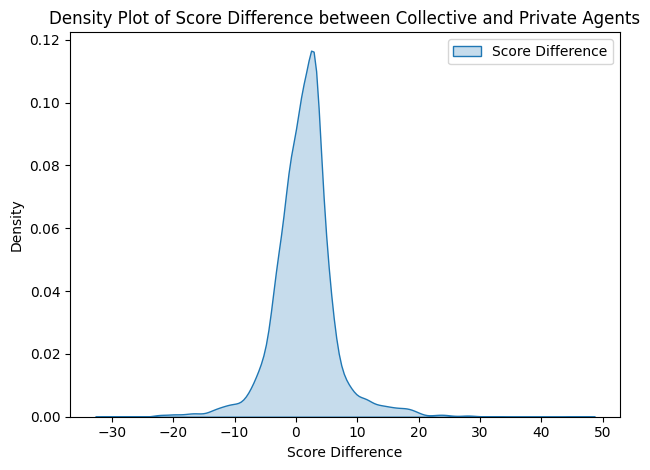

In [ ]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column with the difference between the two scores
df["score_diff"] = df["collective_agent_score"] - df["private_agent_score"]

# Plot the density plots 
sns.kdeplot(data=df, x='score_diff', fill=True)

# Add title and axis labels
plt.title("Density Plot of Score Difference between Collective and Private Agents")
plt.xlabel("Score Difference")
plt.ylabel("Density")

# Add legend
plt.legend(labels=["Score Difference"])

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()